implementing SVM using three kernels.

we will use the dataset stored in `hw6_data`.
three columns: an `x`-coordinate, a `y`-coordinate, and a label (either 1 or 0).
Our goal is to determine which kernel for SVM leads to the best classification of
the data into the two classes.


In [1]:
# Import block
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.svm import SVC

/var/folders/bc/12c6l6q14sj963fcc1srqp_c0000gn/T/ipykernel_14375/710598324.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[inds] = i
/var/folders/bc/12c6l6q14sj963fcc1srqp_c0000gn/T/ipykernel_14375/710598324.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[inds] = i
/var/folders/bc/12c6l6q14sj963fcc1srqp_c0000gn/T/ipykernel_14375/710598324.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[inds] = i


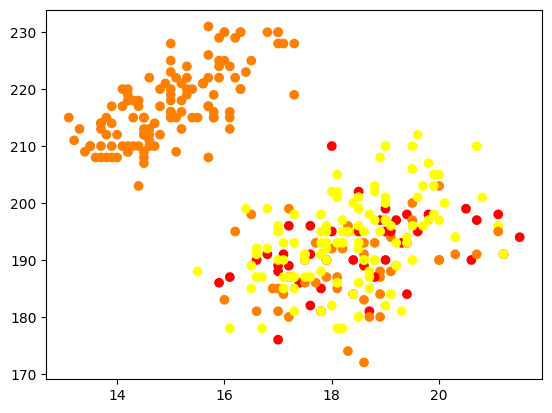

In [8]:
# Data import block
data_pd = pd.read_csv("hw6data.csv", sep=",", header=None)
data_np = pd.DataFrame.to_numpy(data_pd)
plt.scatter(data_np[:,0], data_np[:,1], c = data_np[:,2], cmap="autumn")
data_pd

## Question 1: Projecting data to higher spaces

In this question, we will visualize the impact of two different projections 
on our data. Our investigations will be conducted on both the mean-centered 
and non-mean-centered data.   

### Part A - Centering our data

For this part, create `mean_centered()` data that takes in the data and 
returns data that is centered around the origin (ie. the 0 vector). 

_Note:_ The data for this homework assignment has three columns: 1) an $x$-
value, 2) a $y$-value, and 3) a class label. Your function should take in 
the data with the labels, but the centering should **only** be applied to 
the $x$- and $y$-values.

In [3]:
def compute_mse(truth_vec, predict_vec):
    return np.mean((truth_vec - predict_vec)**2)

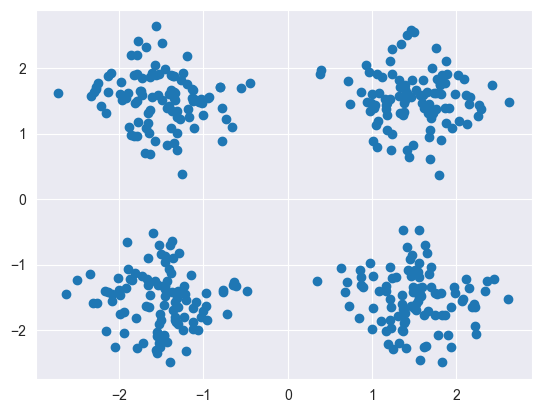

In [4]:
def mean_centered(data):
    data_xy = data[:,:2]
    means = np.ones(data_xy.shape)
    ones = np.mean(data_xy, axis=0)

    # https://www.geeksforgeeks.org/numpy-column_stack-in-python/
    # did not want to transform data into 1d to use hstack
    data_n = np.column_stack((data_xy - means*ones, data[:,2]))
    return data_n

data_ct = mean_centered(data_np)
plt.scatter(data_ct[:,0],data_ct[:,1])

### Part B - Visualizing projections under our kernels

Recall that the idea behind a kernel is to replace the process of projecting 
our data to a higher space and then computing the SVM. In this part, we will 
construct two different projections that move 2D to 3D:
* Projection 1: $(x_1,x_2)$ --> $(x_1, x_2, \exp{-(x_1^2 +x_2^2)})$  
* Projection 2: $(x_1,x_2)$ --> $(x_1^2,\sqrt{2}x_1x_2, x_2^2)$  

for this question, create four 3-dimensional plots, one for each of the following:
* Projection 1 on data **without** mean-centering  
* Projection 1 on **mean-centered** data  
* Projection 2 on data **without** mean-centering  
* Projection 2 on **mean-centered** data   

All of your plots should apply color your data based on the class that it 
belongs to. 


_Note 1:_ Projection 1 is the mental picture that many use to understand the 
_radial basis kernel,_ see [this example](https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html#Beyond-linear-boundaries:-Kernel-SVM). However, we note that 
projection underlying the RBF is a projection to infinite space (see 
discussion [here](Use Gaussian RBF kernel for mapping of 2D data to 3D) and 
[here](https://stats.stackexchange.com/questions/109300/applying-an-rbf-kernel-first-and-then-train-using-a-linear-classifier) for more information). 

_Note 2:_ Projection 2 is similar to the projection underlying the 
_polynomial kernel of degree 2._ To learn more about this kernel, see 
[this wikipedia page](https://en.wikipedia.org/wiki/Polynomial_kernel).

In [5]:
def get_proj1(data):
    proj1 = np.ones((len(data), 3))
    proj1[:,0:2] = proj1[:,0:2]*data[:,0:2]
    proj1[:,2] = proj1[:,2]*np.exp(-1*((proj1[:,0])**2+(proj1[:,1])**2))
    return proj1


def get_proj2(data):
    proj2 = np.ones((len(data), 3))
    proj2[:,0] = data[:,0]**2
    proj2[:,1] = (2**(1/2))*data[:,0]*data[:,0]
    proj2[:,2] = data[:,1]**2
    return proj2


In [6]:
data_ctd = mean_centered(data_np)


# * Projection 1 on data **without** mean-centering
proj1_no_ct = get_proj1(data_np)

# * Projection 1 on **mean-centered** data
proj1_ctd = get_proj1(data_ctd)

# * Projection 2 on data **without** mean-centering
proj2_no_ct = get_proj2(data_np)

# * Projection 2 on **mean-centered** data
proj2_ctd = get_proj2(data_ctd)

print(proj1_no_ct)

[[4.91788062e+00 4.57868397e+00 2.46404722e-20]
 [3.67814635e+00 1.66922296e+00 8.21215079e-08]
 [2.34275482e+00 1.35275014e+00 6.63200565e-04]
 ...
 [1.09673941e+00 4.33680538e+00 2.03917972e-09]
 [2.20406898e+00 1.41799290e+00 1.03990706e-03]
 [4.17553363e+00 1.15401574e+00 7.07404493e-09]]


In [8]:
# copypaste block
# fig = plt.figure()
# ax = plt.axes(projection = '3d')
# ax.scatter(//[:,0], //[:,1], //[:,2])

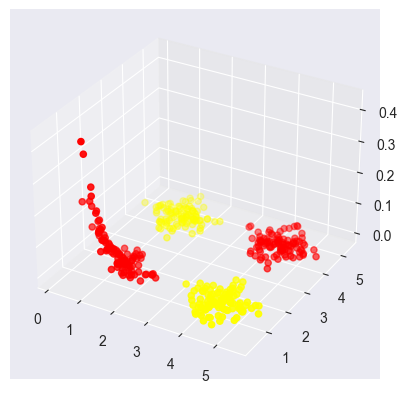

In [9]:
# 3D plot for Projection 1 on data **without** mean-centering
fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.scatter(proj1_no_ct[:,0], proj1_no_ct[:,1], proj1_no_ct[:,2],c = data_np[:,2], cmap = 'autumn')

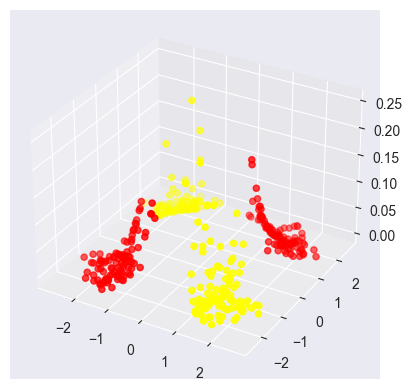

In [10]:
# 3D plot for Projection 1 on data **with** mean-centering
fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.scatter(proj1_ctd[:,0], proj1_ctd[:,1], proj1_ctd[:,2], c = data_np[:,2], cmap = 'autumn')

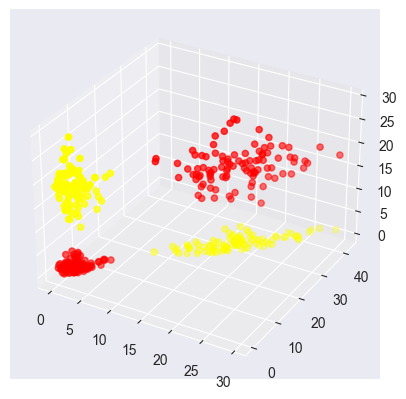

In [11]:
# 3D plot for Projection 2 on data **without** mean-centering
fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.scatter(proj2_no_ct[:,0], proj2_no_ct[:,1], proj2_no_ct[:,2], c = data_np[:,2], cmap = 'autumn')

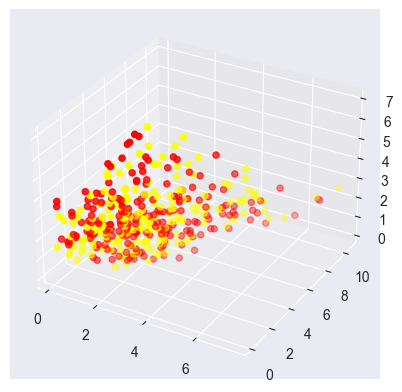

In [12]:
# 3D plot for Projection 2 on data **with** mean-centering
fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.scatter(proj2_ctd[:,0], proj2_ctd[:,1], proj2_ctd[:,2], c = data_np[:,2], cmap = 'autumn')

### Part C - Choose a "best" projection

In kernel SVM, our goal is to project our data into a higher dimensional 
space such that the classes are well separated. Examine your four plots 
and decide which one offers the best resulting projection for splitting 
the data with a rigid plane (as in a wall dividing the 3D space). In your 
answer, you must state: 1) which projection (1 or 2) you are selecting 
and 2) whether the data needs to be mean-centered or not. Justify your 
choice. 

**Markdown block for your answer**
In my opinion, the best projection is the mean centered projection 1. I'm inclined to believe that it's the best separation as this projection allows for us to see the pattern in data better.

## Question 2: Perform 10-fold Cross-Validation

Create a function `ten_fold` that performs a 10-fold cross validation for 1) a 
given dataset, 2) a specified kernel, and 3) a flag that tells you whether 
to mean-center your data. Your function should only output the cross-validation 
error and nothing else. 

Perform 10-fold cross-validation to determine which kernel is the appropriate one 
for our SVM: 
* Linear kernel (ie. the usual dot-product one)
* Radial basis kernel (ie. the one with a projection similar to projection 1)
* Polynomial kernel of degree 2  (ie. the one with a projection similar to projection 2)

For the later two, either pre-process your data with mean-centering or not, 
based on your answer from question 1C. 

Select one of your kernels as the appropriate one. Justify your choice.

In [13]:
def plot_svc_decision_function(SVM, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create grid to evaluate SVM model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = SVM.decision_function(xy).reshape(X.shape)

    # Plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # Plot support vectors
    if plot_support:
        ax.scatter(SVM.support_vectors_[:, 0],
                   SVM.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none', edgecolors='k');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)


In [14]:
def ten_fold(data_with_classes, kernel: str, mean_center_flag: bool):

    # Set constants
    poly_kernel_degree = 2
    k = 10  # 10 folds
    if mean_center_flag:
        data_with_classes = mean_centered(data_with_classes)

    # Indexes to split data into inputs and outputs for predictions
    inds_in = [0, 1]
    inds_out = 2

    # Dividing the data into k sets
    sets = []
    size = len(data_with_classes) // k
    for i in range(1, k + 1):
        sets.append(data_with_classes[size * (i - 1): size * i])

    # # Computing train and test errors for where
    # # each set acts as the testing data
    # Initial Train and test error lists
    train_errors = []
    test_errors = []

    # Compute for each set
    for i in range(len(sets)):
        test_set = sets[i]
        # Avoid error with concatenating arrays of shape (0,0) and (len(sets),3)
        train_set = [[0, 0, 0]]
        for j in range(len(sets)):
            if j != i:
                train_set = np.concatenate((train_set, sets[j]))
        train_set = train_set[1:]

        # Fit model to training dataset
        # Maybe there's a better way to construct to make reusable
        if kernel == 'rbf':
            line_svm = SVC(kernel=kernel, C=0.000001)
        elif kernel == 'poly':
            line_svm = SVC(kernel=kernel, degree=poly_kernel_degree, gamma='auto')
        else:
            line_svm = linear_model.LinearRegression()

        mod_i = line_svm.fit(train_set[:, inds_in], train_set[:, inds_out])

        # Compute the training error
        train_preds_i = mod_i.predict(train_set[:, inds_in])
        train_error_i = compute_mse(train_preds_i, train_set[:, inds_out])
        train_errors.append(train_error_i)

        # Compute the testing error
        test_preds_i = mod_i.predict(test_set[:, inds_in])
        test_error_i = compute_mse(test_preds_i, test_set[:, inds_out])
        test_errors.append(test_error_i)
    return np.mean(test_errors)


In [16]:
print(ten_fold(data_np, 'rbf', True),  "RBF kernel SVM, centered")
print(ten_fold(data_np, 'rbf', False),  "RBF kernel SVM, non-centered")
print(ten_fold(data_np, 'poly', True),  "Poly kernel SVM, centered")
print(ten_fold(data_np, 'poly', False),  "Poly kernel SVM, non-centered")
print(ten_fold(data_np, 'linear', True),  "linear kernel SVM, centered")
print(ten_fold(data_np, 'linear', False),  "linear kernel SVM, non-centered")


RBF kernel SVM, centered 0.5549999999999999
RBF kernel SVM, non-centered 0.5549999999999999
Poly kernel SVM, centered 0.0
Poly kernel SVM, non-centered 0.0075000000000000015
linear kernel SVM, centered 0.2544843972014243
linear kernel SVM, non-centered 0.2544843972014243


**Discuss which kernel is the "appropriate" one. Justify your choice.**
The lowest error rate is for centered polynomial kernel of defree 2. Inferring from the mean test error cross-evaluated by 10-fold eval.

## Question 3: Tune your model 

Once you have selected your kernel, use all of the data to tune the SVM using 
your selected kernel. Show the results in a 2-D plot that shows **both** the 
decision boundary and the margins. Note your observations about this plot in 
two to four sentences. 

In [17]:
# Tune your model

line_svm = SVC(kernel='poly', degree=2, gamma='auto')

mod_i = line_svm.fit(data_np[:, :2], data_np[:, 2])


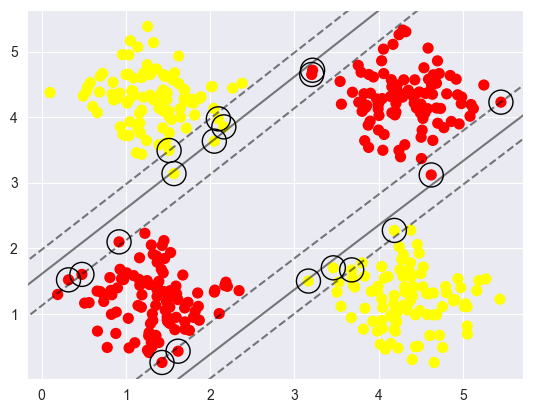

In [18]:
# Plot datapoints from the train/test set with the SVM
plt.scatter(data_np[:, 0], data_np[:, 1], c=data_np[:,2], s=50, cmap='autumn')
plot_svc_decision_function(line_svm, plot_support=True)

**State your observations about the validation set and your selected SVM in this block**
Selected SVM proves to be a good fit for the data, as there are some points violating the margin, however there are no points violating the boundary.

## Question 4: Explore new data

There is some new data contained in the `validation.csv`. Using the kernel 
SVM you tuned from question 3 determine which classes your SVM classifier 
thinks the points should belong to. Compare these SVM given classes to the 
*actual* classes that they belong to.

Show this validation data on the same plot as the decision boundary and the 
margins _without_ the data used to tune the model.



Assuming that validation.csv is the test.csv

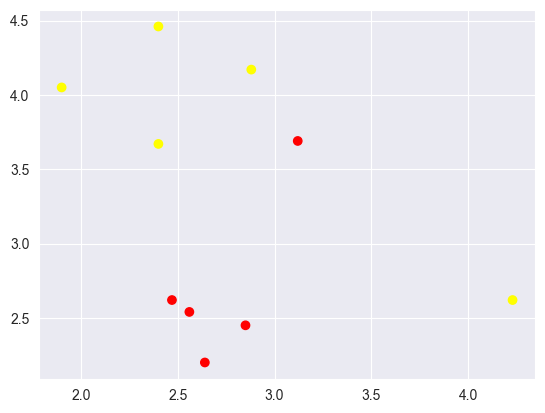

In [20]:
# Reading data from the test.csv file and plotting it.
data_test = pd.read_csv("test.csv", sep=",", header=None)
data_test_np = pd.DataFrame.to_numpy(data_test)
plt.scatter(data_test_np[:,0], data_test_np[:,1], c = data_test_np[:,2], cmap="autumn")

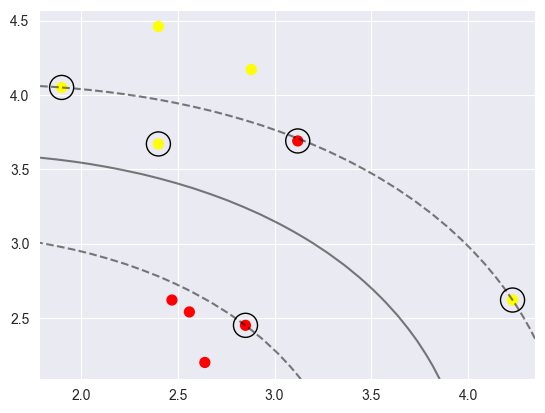

In [21]:
# Use your model to predict the classes for the
# data points in the validation set

line_poly = SVC(kernel='poly', degree=2, gamma='auto')
line_poly.fit(data_test_np[:, :2], data_test_np[:, 2])

# Plot datapoints from the validation set with the SVM
plt.scatter(data_test_np[:, 0], data_test_np[:, 1], c=data_test_np[:, 2], s=50, cmap='autumn')
plot_svc_decision_function(line_poly, plot_support=True)

**State your observations about the validation set and your selected SVM in this block**
The selected SVM seems to perform well on the test dataset presenting only one violation of the boundary.

## Question 5: Tests passing 
For this question, please submit screenshots of your tests passing locally and 
on github actions. 